# Higher Education Students Performance Evaluation

## Data Source: Kaggle
https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation?select=student_prediction.csv

## Abstract:

The data was collected from the **Faculty of Engineering and Faculty of Educational Sciences students** in 2019. The purpose is to predict students' end-of-term performances using ML techniques.

#Columns and their Description

| Attribute | Description |
|---|---|
| Student ID | Unique identifier for each student |
| Age | 1: 18-21, 2: 22-25, 3: above 26 |
| Sex | 1: female, 2: male |
| High-school type | 1: private, 2: state, 3: other |
| Scholarship type | 1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full |
| Additional work | 1: Yes, 2: No |
| Artistic/sports activity | 1: Yes, 2: No |
| Partner | 1: Yes, 2: No |
| Total salary | 1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410 |
| Transportation | 1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other |
| Accommodation | 1: rental, 2: dormitory, 3: with family, 4: Other |
| Mother's education | 1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D. |
| Father's education | 1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D. |
| Number of siblings | 1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above |
| Parental status | 1: married, 2: divorced, 3: died - one of them or both |
| Mother's occupation | 1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other |
| Father's occupation | 1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other |
| Weekly study hours | 1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours |
| Reading frequency (non-scientific) | 1: None, 2: Sometimes, 3: Often |
| Reading frequency (scientific) | 1: None, 2: Sometimes, 3: Often |
| Seminar/conference attendance | 1: Yes, 2: No |
| Project impact | 1: positive, 2: negative, 3: neutral |
| Class attendance | 1: always, 2: sometimes, 3: never |
| Midterm exam 1 preparation | 1: alone, 2: with friends, 3: not applicable |
| Midterm exam 2 preparation | 1: closest date to the exam, 2: regularly during the semester, 3: never |
| Taking notes in classes | 1: never, 2: sometimes, 3: always |
| Listening in classes | 1: never, 2: sometimes, 3: always |
| Discussion impact | 1: never, 2: sometimes, 3: always |
| Flip-classroom | 1: not useful, 2: useful, 3: not applicable |
| Last semester GPA | 1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 |
| Expected graduation GPA | 1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 |
| Course ID | Unique identifier for the course |
| Output Grade | 0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA |

## **Importing the necessary modules**

In [143]:
from imblearn.over_sampling import ADASYN
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## **Loading the dataset and Viewing properties of the dataset**


In [144]:
higher_education_df = pd.read_csv('student_prediction.csv')
higher_education_df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


Getting the **dimensions** or **shape** of my dataset

In [145]:
higher_education_df.shape

(145, 33)

Here we are using the **.info()** to get information concerning each columns i.e. **Dtype (data type)** and the total number of **Non-Null** rows for each column, as we can see it appears that all columns have all rows to be **Non-Null**  it should be a total of **145** non-null rows.

In [146]:
higher_education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

But the **.info()** gives us different info but if we want to know just the sum of nullable rows in each column in a better format, we would use the combination of **.isna()** and **sum()** methods.

In [183]:
higher_education_df['AGE'].unique()

array([2, 1, 3])

In [148]:
higher_education_df.isna().sum()

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [149]:
higher_education_df.dtypes

STUDENTID        object
AGE               int64
GENDER            int64
HS_TYPE           int64
SCHOLARSHIP       int64
WORK              int64
ACTIVITY          int64
PARTNER           int64
SALARY            int64
TRANSPORT         int64
LIVING            int64
MOTHER_EDU        int64
FATHER_EDU        int64
#_SIBLINGS        int64
KIDS              int64
MOTHER_JOB        int64
FATHER_JOB        int64
STUDY_HRS         int64
READ_FREQ         int64
READ_FREQ_SCI     int64
ATTEND_DEPT       int64
IMPACT            int64
ATTEND            int64
PREP_STUDY        int64
PREP_EXAM         int64
NOTES             int64
LISTENS           int64
LIKES_DISCUSS     int64
CLASSROOM         int64
CUML_GPA          int64
EXP_GPA           int64
COURSE ID         int64
GRADE             int64
dtype: object

After checking the types of my data I have decided to drop the **STUDENTID** column one because it provides no useful information that would help us predict the grade and also it has a datatype of string and not categorical because each student have different unique id.

# FEATURE ENGINEERING AND RELATIONSHIPS

**creating new features to see how they help in model performance**

In [150]:
columns_to_remove = ['STUDENTID']
higher_education_df.drop(columns=columns_to_remove, inplace=True)

### **Checking the Statistical Properties of our data**
I am doing this to check the range of each column in our data, basically features of this data that would help me decide if I am to normalize my data or not. This is important to the machine learning algorithms I would be applying, and also so other techniques that I would not be using for this model training but important to know about, and here is a table for normalization.

| Algorithm | What Normalization Does |
|---|---|
| k-Nearest Neighbors (k-NN) | Ensures all features contribute equally to the distance metric. |
| Support Vector Machines (SVM) | Ensures all features contribute equally to the hyperplane's definition. |
| Gradient Descent-based Algorithms (e.g., Linear Regression, Logistic Regression, Neural Networks) | Stabilizes the gradients, leading to faster convergence and better performance. |
| Principal Component Analysis (PCA) | Ensures all features contribute equally to the principal component analysis. |

In [151]:
higher_education_df.describe()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


so from the previous information and now with the statistical description of all my columns excluding the grade column it appears that my data are already on a similar scale, but still normalization or standardization could further improve the performance of some machine learning algorithms by preventing large values from dominating the learning process, also taking into consideration we have a small sample size, I must try as much as possible to prevent overfitting, before this I want to check the correlation between features in my table and to the grade(target column)

**Creating a correlation matrix to look for multicollinearity between features, which indicating these features are redundant and will not provide additional information for our machine learning model making our model unstable due to misinterpretation of model's coefficient.**

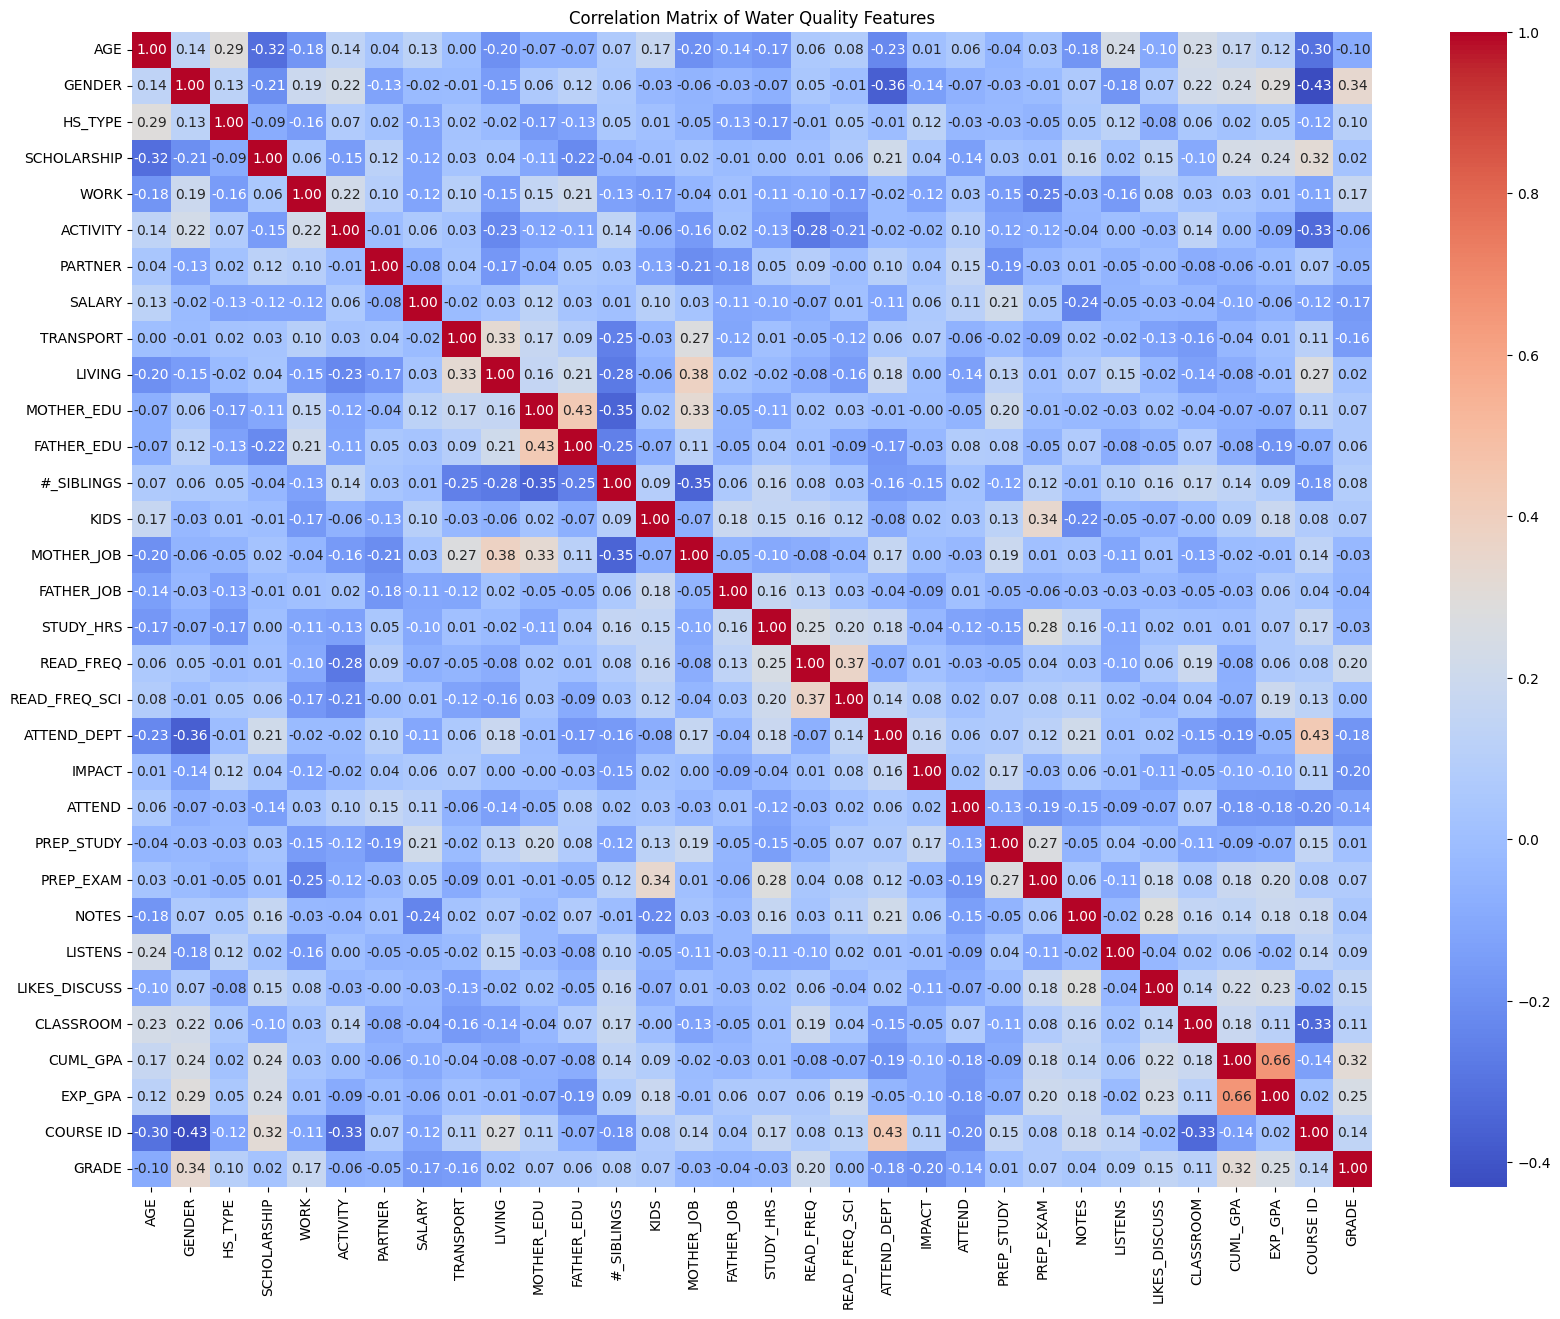

In [152]:
correlation_matrix = higher_education_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Performance in Higher Education")
plt.show()

### My Intuitions on Feature Analysis

**1. Multicollinearity:**

* **Observation:** The correlation heatmap revealed a high correlation (above 0.6) between 'cumlgpa' and 'expgpa', indicating potential multicollinearity.
* **Intuition:** Multicollinearity can make the model unstable and difficult to interpret due to redundant information.
* **Action:** To mitigate this, I'll remove one of the highly correlated features (e.g., 'expgpa') using: **higher_education_df.drop(columns=['EXP_GPA'], inplace=True)** and re-run my correlation analysis.

**2. Low Feature Correlation with Target:**

* **Observation:** None of the features show a strong correlation (absolute value >= 0.6) with the target variable ('Output Grade').
* **Intuition:** This suggests a potential lack of a strong *linear* relationship between individual features and the target. **However, this doesn't mean the features are useless.**
* **Considerations:**
    * **Complex Relationships:** Simple correlation analysis might not capture complex, non-linear relationships. Algorithms like decision trees, random forests, or neural networks could uncover these intricate patterns.
    * **Feature Interactions:**  The combined effect of features might be more predictive than individual features alone. For example, 'study hours' and 'attendance' together could be a stronger predictor than either one by itself.

In [153]:
higher_education_df.drop(columns=['EXP_GPA'], inplace=True)

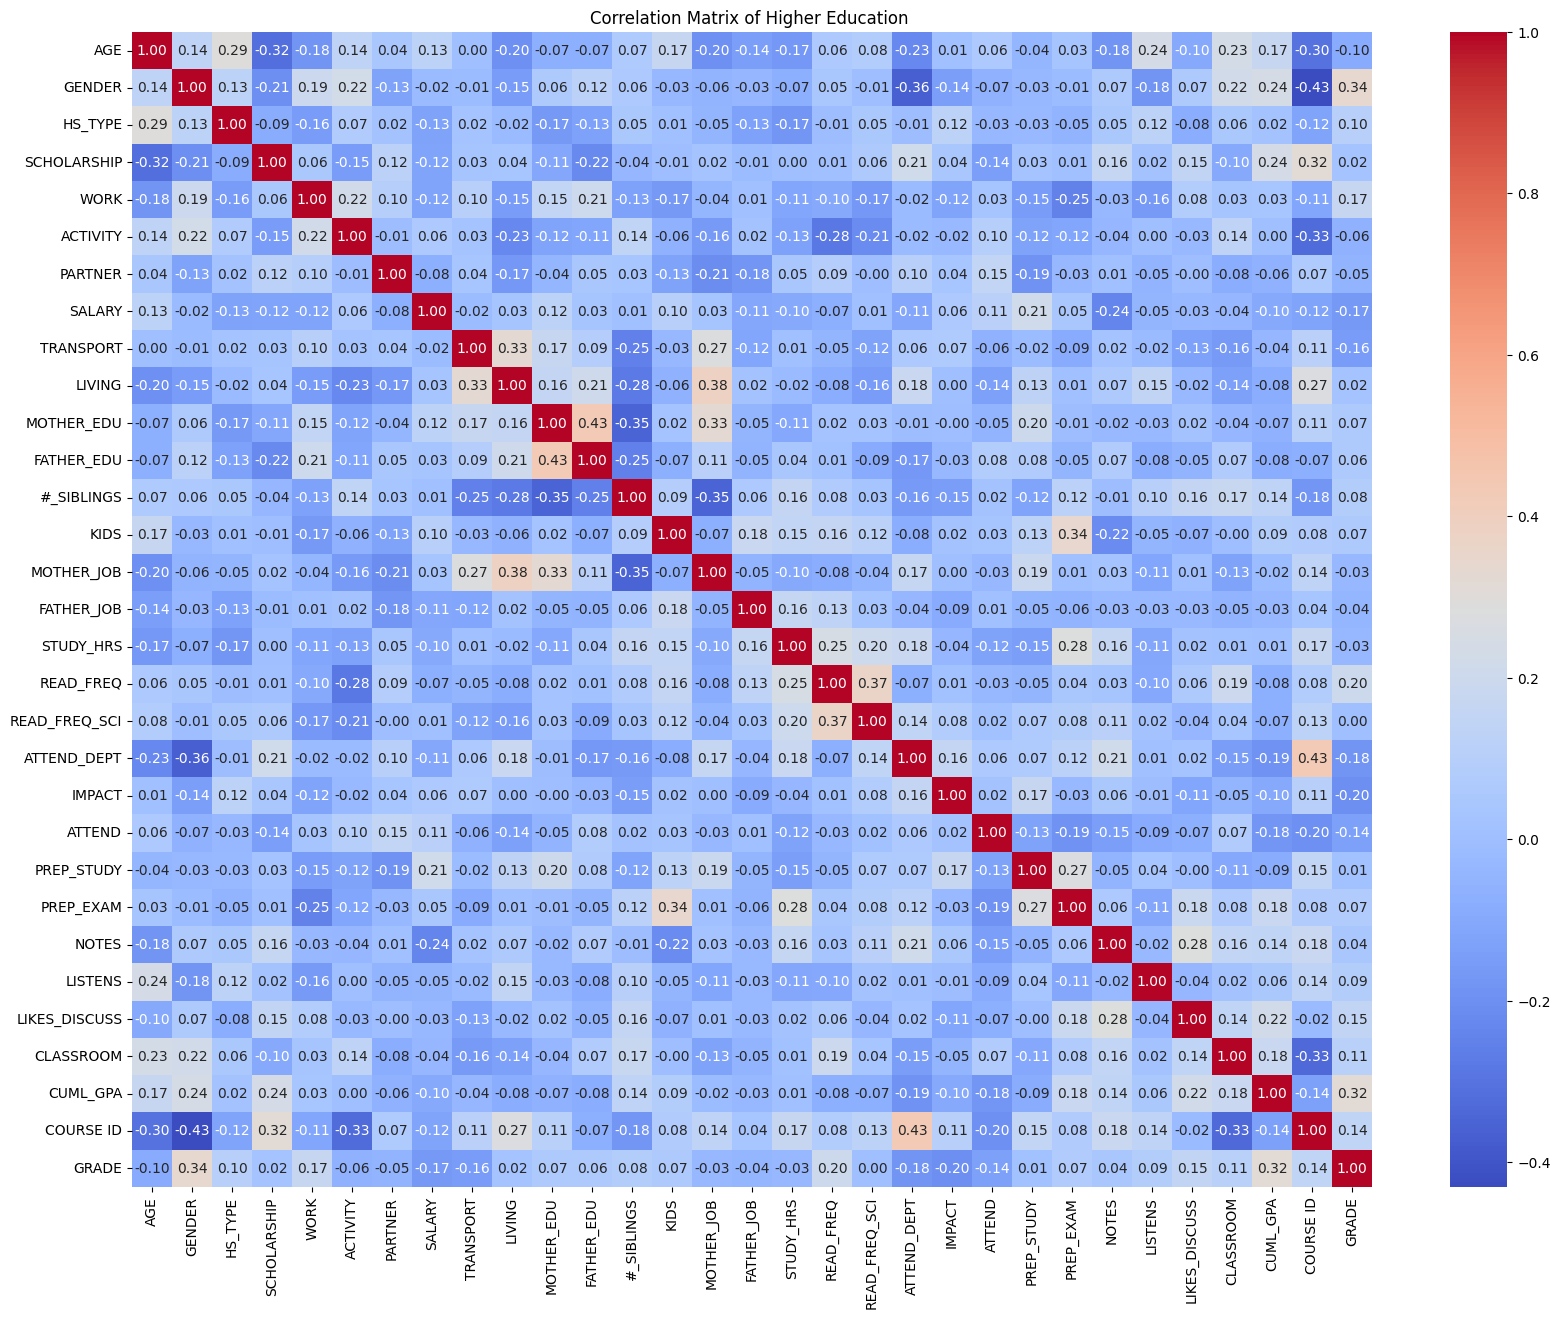

In [154]:
correlation_matrix = higher_education_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Performance in Higher Education")
plt.show()

# Checking GRADE(target class) for class imbalance

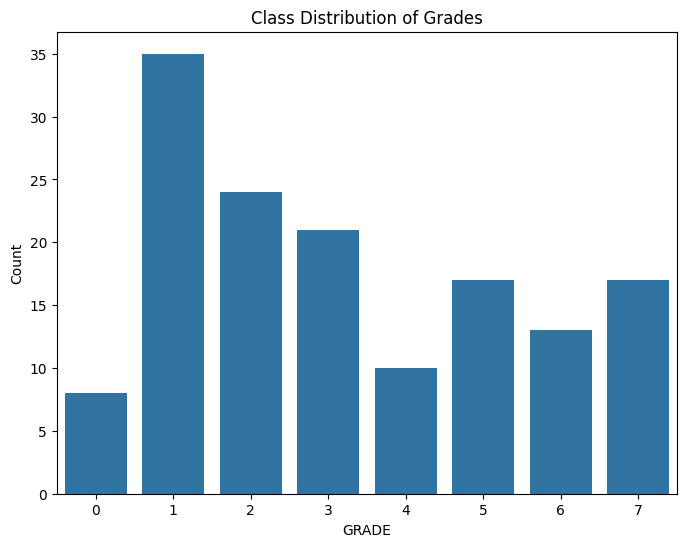

In [155]:
# Calculate the percentage of each class
class_percentages = higher_education_df['GRADE'].value_counts(normalize=True) * 100
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='GRADE', data=higher_education_df)
plt.title('Class Distribution of Grades')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.show()

From the plot there is a trace of class imbalance and this is the lack of volume, variety in our dataset, so I would Introduce synthetic data in a more intelligent and mathematical way using **ADASYN** and also optimize the models to their best to avoid overfitting.

In [156]:
higher_education_df.columns

Index(['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY',
       'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU',
       '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS',
       'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT', 'ATTEND',
       'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS',
       'CLASSROOM', 'CUML_GPA', 'COURSE ID', 'GRADE'],
      dtype='object')

In [157]:
NUM_OF_ROWS = 5008
samples_per_class = NUM_OF_ROWS // higher_education_df['GRADE'].nunique()

strategy = {grade: samples_per_class for grade in higher_education_df['GRADE'].unique()}
adasyn = ADASYN(sampling_strategy=strategy, random_state=42)

X = higher_education_df.drop('GRADE', axis=1)
y = higher_education_df['GRADE']

X_resampled, y_resampled = adasyn.fit_resample(X, y)

augmented_df = pd.DataFrame(X_resampled, columns=X.columns)
augmented_df['GRADE'] = y_resampled

higher_education_df = augmented_df

# 6. Verify:
print("higher_education_df shape:", higher_education_df.shape)
print(higher_education_df['GRADE'].value_counts())

higher_education_df shape: (5020, 31)
GRADE
1    634
5    629
7    629
0    627
4    627
6    626
2    625
3    623
Name: count, dtype: int64


#Ensuring data from each class is included in the train, validation, and test sets, since there is an imbalance of class we want each data splits to have some info about some certain class so complex relationship can be learnt from it also.

In [158]:
# Stratified Split for Train and Test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in sss.split(higher_education_df, higher_education_df['GRADE']):
    train_df, test_df = higher_education_df.iloc[train_index], higher_education_df.iloc[test_index]

# Stratified Split for Train and Validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, val_index in sss.split(train_df, train_df['GRADE']):
    train_df, val_df = train_df.iloc[train_index], train_df.iloc[val_index]


# Extract features and labels
train_labels = np.array(train_df.pop('GRADE')).reshape(-1, 1)
val_labels = np.array(val_df.pop('GRADE')).reshape(-1, 1)
test_labels = np.array(test_df.pop('GRADE')).reshape(-1, 1)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

print("Train set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Test set size:", test_df.shape)

Train set size: (3626, 30)
Validation set size: (641, 30)
Test set size: (753, 30)


## Reasoning:

* **`StratifiedShuffleSplit`:** This function ensures that the proportion of samples in each class is maintained across the train, validation, and test sets. This is crucial for datasets with class imbalance.
* **`n_splits=1`:** We only need one split for each stage (train/test and train/validation).
* **`test_size` and `random_state`:** These parameters control the size of the test/validation sets and the randomness of the split, respectively.
* **`sss.split`:** This method generates the indices for splitting the data based on the specified stratification (using the 'Output Grade' column).
* **`iloc`:** This is used to select rows based on the generated indices.

**Normalize the data to ensure all features are in the same range, for this we will be using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1**

**Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.**

In [159]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (3626, 1)
Validation labels shape: (641, 1)
Test labels shape: (753, 1)
Training features shape: (3626, 30)
Validation features shape: (641, 30)
Test features shape: (753, 30)


In [160]:
NUM_CLASSES = higher_education_df['GRADE']
print('List of classes sorted:', sorted(NUM_CLASSES.unique()))
print('Number of classes:', NUM_CLASSES.nunique())

List of classes sorted: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Number of classes: 8


#Build the Models
Now create and train your model using the function that was defined earlier. Notice that the model is fit using a small default batch size of 32, since we have done some processing to handle class imbalance a bit.

In [161]:
# Convert labels to one-hot encoding categorical cross entropy wants labels to be in one hot encoded form
# NUM_CLASSES.nunique() is 8
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=NUM_CLASSES.nunique())
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=NUM_CLASSES.nunique())

In [162]:
EPOCHS = 30
BATCH_SIZE = 32

In [163]:
def loss_curve_plot(history):
  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [164]:
def accuracy_plot(history):
  # Plot training & validation accuracy values
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [165]:
def confusion_matrix_plot(test_labels, test_predictions):
  # Create the confusion matrix
  cm = confusion_matrix(test_labels, test_predictions)

  # Visualizing the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()


In [166]:
def categorical_metrics_result(model, test_features, test_labels):
  test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_features, tf.keras.utils.to_categorical(test_labels, num_classes=NUM_CLASSES.nunique()))
  test_predictions = model.predict(test_features)
  # Convert predictions to class labels by selecting the index of the highest probability
  test_predictions = np.argmax(test_predictions, axis=1)
  f1 = f1_score(test_labels, test_predictions, average='weighted')

  print(f'Test Loss: {test_loss}')
  print(f'Test Accuracy: {test_accuracy}')
  print(f'Test Precision: {test_precision}')
  print(f'Test Recall: {test_recall}')
  print(f'Test F1 Score: {f1}')

In [167]:
def save_neural_network(model):
  model.save("../models/model.keras")

**Model**
first default optimizer: adam

first default learning rate: 0.001

default loss: categorical cross entropy

metrics: accuracy, precision, recall



In [168]:
def model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=NUM_CLASSES.nunique(), activation='softmax') # Output layer with correct number of units
    ])

    # Compile the model
    # Use CategoricalCrossentropy and CategoricalAccuracy for one-hot encoded targets
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.CategoricalCrossentropy(), # Changed to CategoricalCrossentropy
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"), # Changed to CategoricalAccuracy
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])


    return model

# Create the model instance
model = model()

C:\Users\obolo\databases\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


![Untitled-2024-01-15-1532.png](<https://media-hosting.imagekit.io//4a627a491be248d1/Untitled-2024-01-15-1532.png?Expires=1834605025&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=UXouwzvWvka2FxGVK4k2el87sv6sZVhmgQCRCL8HEdQDJ77K7nGCVznz53ZS3alM16MpMM8zVf8ZbYMvHfJZtbyDjoKm23cTKezorm9zu4udbjxDcSDa8rhsCWSmKPv~~uAa0QsE5AJyEZ2Cs4S87R7bpgTY62stCr4~9sAYdT8p8C8cluUq-gXilfRCrgXHrbutekEkuqeJC3iLtBhDGq-gr83t~TavRaxAk6ezIq4BOk~4G5a1SOVqaZ87Xv47W29Fi3uwgZyd2V7TUYB9XndwmspMwOphICY-BCCnBU1cx4cDkFbjC00GraqPZ4459hkcMkQbe9TEHddCYj4jQw__>)

In [169]:
history = model.fit(
    train_features,
    train_labels,  # Use the correctly shaped labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels)  # Use the correctly shaped labels
)

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1751 - loss: 2.1995 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4165 - val_loss: 1.7698 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4814 - loss: 1.6514 - precision: 0.8283 - recall: 0.0230 - val_accuracy: 0.5632 - val_loss: 1.3227 - val_precision: 0.8824 - val_recall: 0.1872
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6013 - loss: 1.2074 - precision: 0.8845 - recall: 0.2537 - val_accuracy: 0.6505 - val_loss: 1.0141 - val_precision: 0.8942 - val_recall: 0.4087
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6850 - loss: 0.9367 - precision: 0.8802 - recall: 0.4437 - val_accuracy: 0.7145 - val_loss: 0.8073 - val_precision: 0.8856 - val_recall: 0.5679
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7667 - loss: 0.7299 - precision: 0.8933 - recall: 0.6082 - val_accuracy: 0.781

In [170]:
# Predict labels for the test set
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [171]:
# Print out metrics
categorical_metrics_result(model, test_features, test_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9667 - loss: 0.1730 - precision: 0.9686 - recall: 0.9667
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test Loss: 0.16231200098991394
Test Accuracy: 0.9721115827560425
Test Precision: 0.9734042286872864
Test Recall: 0.9721115827560425
Test F1 Score: 0.9720873174427379


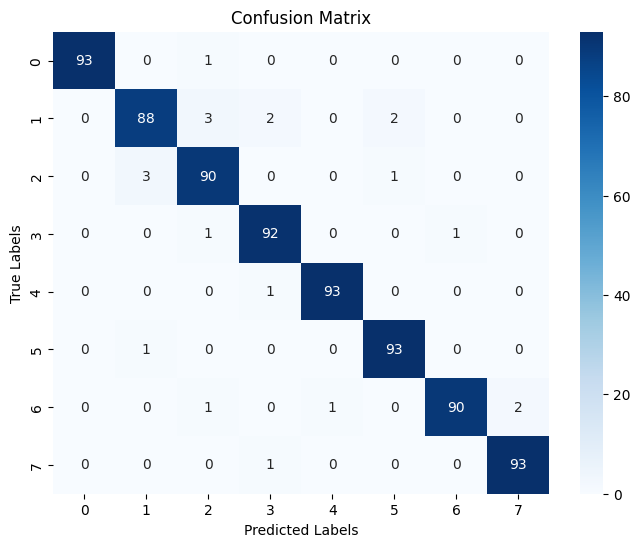

In [172]:
# Create the confusion matrix
confusion_matrix_plot(test_labels, test_predictions)

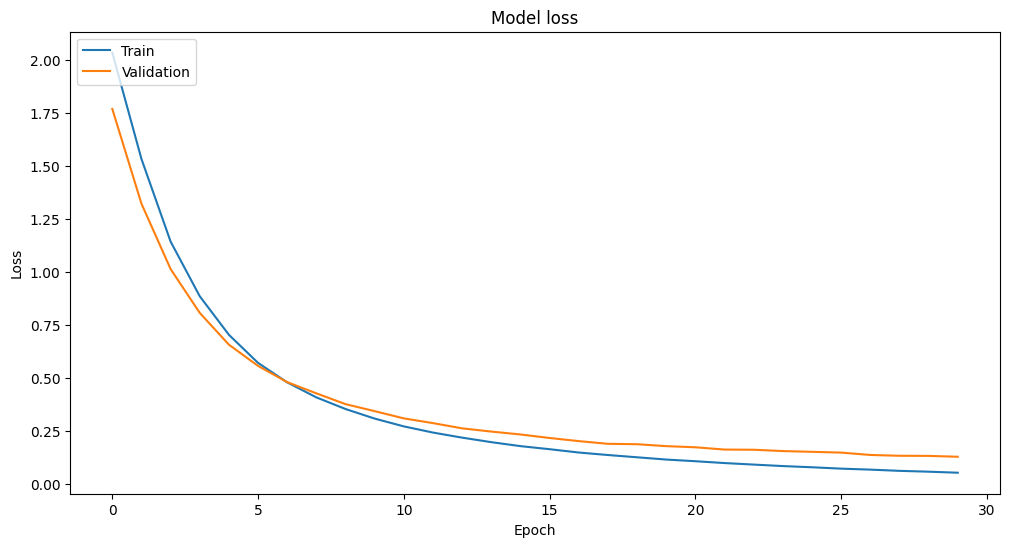

In [173]:
# Plot loss curve
loss_curve_plot(history)

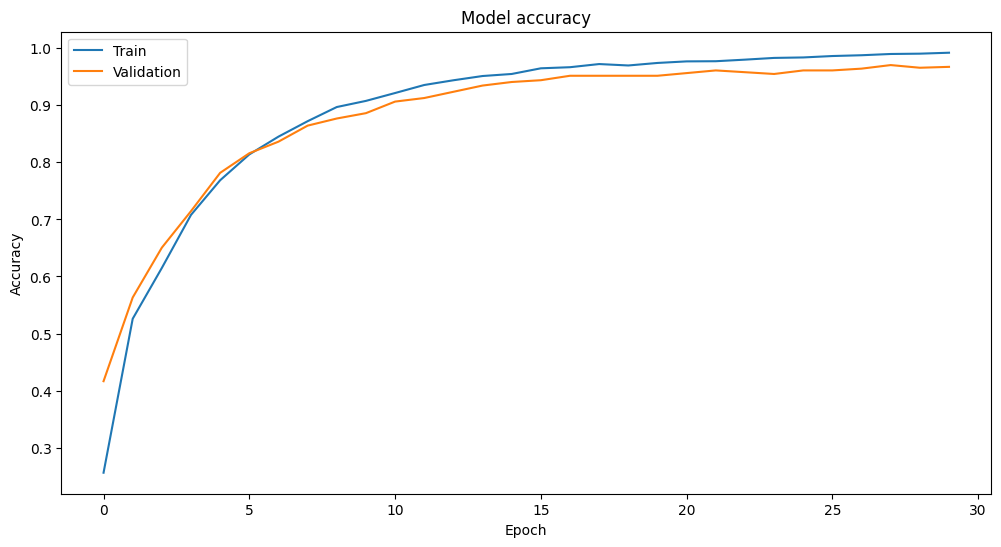

In [174]:
# Plot accuracy curve
accuracy_plot(history)

# SAVING SCALERS, CATEGORICAL MAPPING, AND MODEL FOR LATER USE

In [175]:
categorical_mapping = {
    'AGE': {1: '18-21', 2: '22-25', 3: 'Above 26'},
    'GENDER': {1: 'Female', 2: 'Male'},
    'HS_TYPE': {1: 'Private', 2: 'State', 3: 'Other'},
    'SCHOLARSHIP': {1: 'None', 2: '25%', 3: '50%', 4: '75%', 5: 'Full'},
    'WORK': {1: 'Yes', 2: 'No'},
    'ACTIVITY': {1: 'Yes', 2: 'No'},
    'PARTNER': {1: 'Yes', 2: 'No'},
    'SALARY': {1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'Above 410'},
    'TRANSPORT': {1: 'Bus', 2: 'Private car/taxi', 3: 'Bicycle', 4: 'Other'},
    'LIVING': {1: 'Rental', 2: 'Dormitory', 3: 'With family', 4: 'Other'},
    'MOTHER_EDU': {1: 'Primary school', 2: 'Secondary school', 3: 'High school', 4: 'University', 5: 'MSc.', 6: 'Ph.D.'},
    'FATHER_EDU': {1: 'Primary school', 2: 'Secondary school', 3: 'High school', 4: 'University', 5: 'MSc.', 6: 'Ph.D.'},
    '#_SIBLINGS': {1: '1', 2: '2', 3: '3', 4: '4', 5: '5 or above'},
    'KIDS': {1: 'Yes', 2: 'No'},
    'MOTHER_JOB': {1: 'Retired', 2: 'Housewife', 3: 'Government officer', 4: 'Private sector employee', 5: 'Self-employment', 6: 'Other'},
    'FATHER_JOB': {1: 'Retired', 2: 'Government officer', 3: 'Private sector employee', 4: 'Self-employment', 5: 'Other'},
    'STUDY_HRS': {1: 'None', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'More than 20 hours'},
    'READ_FREQ': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'READ_FREQ_SCI': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'ATTEND_DEPT': {1: 'Yes', 2: 'No'},
    'IMPACT': {1: 'Positive', 2: 'Negative', 3: 'Neutral'},
    'ATTEND': {1: 'Always', 2: 'Sometimes', 3: 'Never'},
    'PREP_STUDY': {1: 'Alone', 2: 'With friends', 3: 'Not applicable'},
    'PREP_EXAM': {1: 'Closest date to the exam', 2: 'Regularly during the semester', 3: 'Never'},
    'NOTES': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'LISTENS': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'LIKES_DISCUSS': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'CLASSROOM': {1: 'Not useful', 2: 'Useful', 3: 'Not applicable'},
    'CUML_GPA': {1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'Above 3.49'},
    'COURSE ID': {i: f'Course {i}' for i in range(1, 10)},
    'GRADE': {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'},
}

In [176]:
# save categorical mappings
joblib.dump(categorical_mapping, '../models/categorical_mapping.pkl')

['../models/categorical_mapping.pkl']

In [177]:
# save standard scaler
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [178]:
# save model
save_neural_network(model)

# FEATURE VISUALIZATION AND STORY TELLING

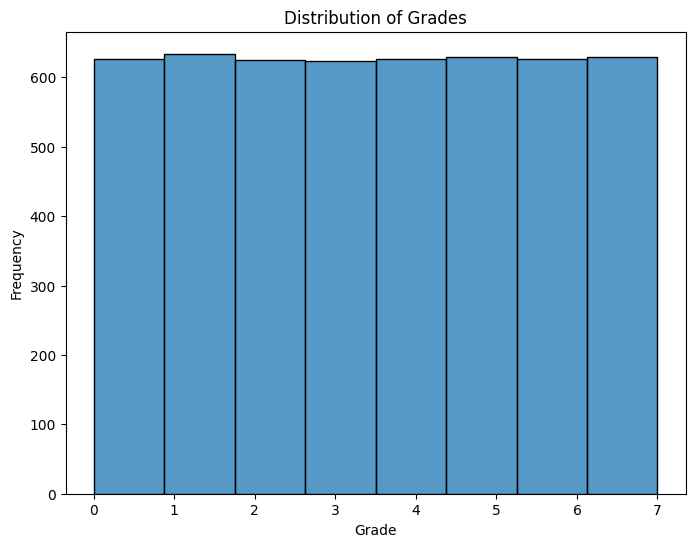

In [179]:
plt.figure(figsize=(8, 6))
sns.histplot(higher_education_df['GRADE'], bins=8, kde=False)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

This histogram shows the frequency of each grade in your dataset. It helps you understand the overall grade distribution, whether it's skewed towards certain grades, and if there are any outliers. For example, if the distribution is heavily skewed towards lower grades, it might indicate a challenging course or the need for more student support

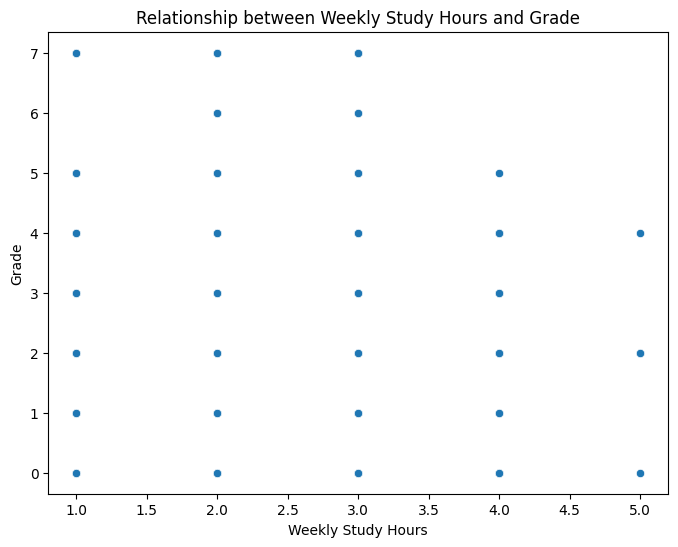

In [180]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='STUDY_HRS', y='GRADE', data=higher_education_df)
plt.title('Relationship between Weekly Study Hours and Grade')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Grade')
plt.show()

**Interpretation:**

This scatter plot explores the relationship between weekly study hours and the final grade. You might observe a positive correlation, suggesting that students who dedicate more hours to studying tend to achieve higher grades. However, look for any patterns or clusters that might reveal more nuanced insights. For instance, there might be a point of diminishing returns where excessive study hours don't lead to significant grade improvements.

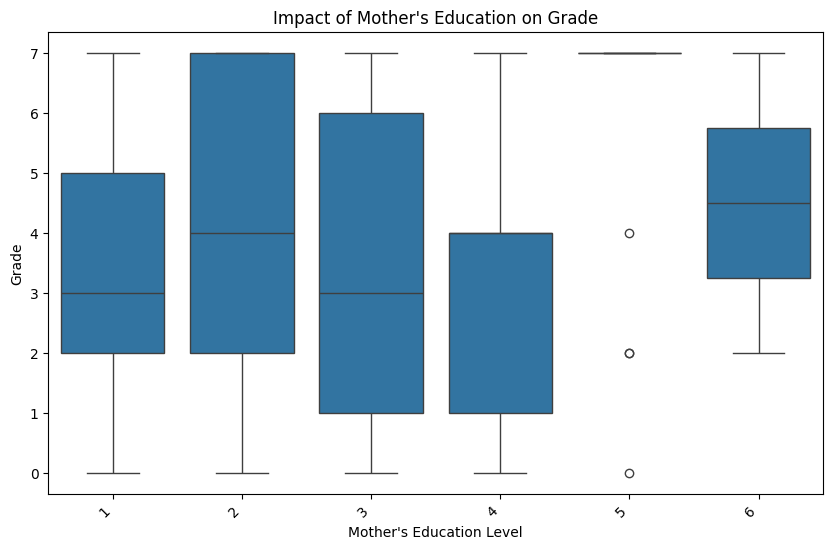

In [181]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MOTHER_EDU', y='GRADE', data=higher_education_df)
plt.title('Impact of Mother\'s Education on Grade')
plt.xlabel("Mother's Education Level")
plt.ylabel('Grade')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretation:**

This box plot compares the distribution of grades for students with different levels of mother's education. It can reveal if there's a relationship between parental education and student performance. For instance, you might find that students whose mothers have higher education levels tend to achieve higher grades on average, suggesting a potential influence of parental background on academic success.

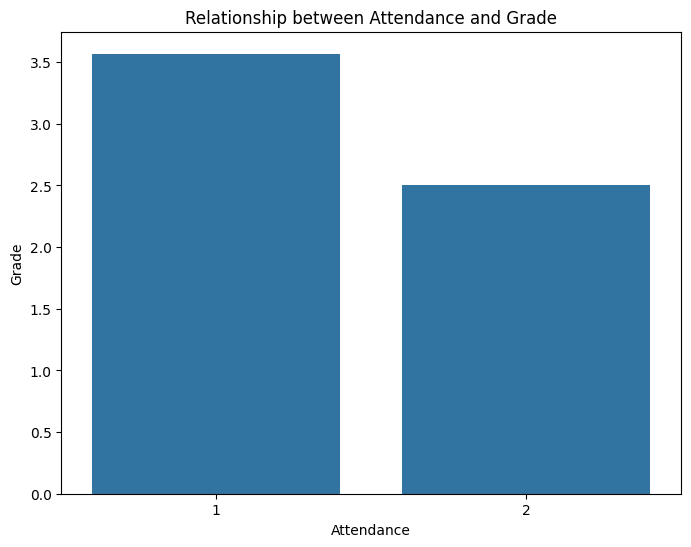

In [182]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ATTEND', y='GRADE', data=higher_education_df, errorbar=None)  # Remove error bars if needed
plt.title('Relationship between Attendance and Grade')
plt.xlabel('Attendance')
plt.ylabel('Grade')
plt.show()

**Interpretation:**

This bar chart shows the average grade achieved based on attendance levels. A comparison can reveal the impact of attendance on students performance. You might find that students with higher attendance tend to perform better, suggesting a potential link between regular class participation and academic success.